# AIDM7330 Basic Programming for Data Science

# Graph analysis and exploration with NetworkX

`NetworkX` is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

- Python language data structures for directed and unirected graphs as well as multigraphs
- Nodes can be text, images, XML records, etc.
- Edges can hold arbitrary data, such as weights, time-series, etc.
- Includes standard graph algorithms as well as network structure and analysis measures
- Functions for (basic) graph representation are included

## Basic graph functions

Create an undirected graph. It will contain nodes and edges iterator (similar to lists)

In [3]:
# Install NetworkX using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install networkx

In [2]:
!pip install --user decorator==4.3.0
!pip install --user networkx==2.4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import networkx as nx

G=nx.Graph()#empty graph

print(G.nodes())
print(G.edges())

print(type(G.nodes()))
print(type(G.edges()))
#1.node view 2. edge view

[]
[]
<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


### Add nodes to the graph

Can be added singularly or from lists

In [5]:
# adding just one node:
G.add_node('a')

# a list of nodes:
G.add_nodes_from(['b','c'])

print('Nodes of graph: ')
print(G.nodes())
print('Edges of graph: ')
print(G.edges())

Nodes of graph: 
['a', 'b', 'c']
Edges of graph: 
[]


### Add edges to the graph

If the start/end nodes of the edge are not included in the graph, they will be created.

In [6]:
G.add_edge(1,2)#if nodes don't exist,create from node1 to node2,generate node 1 and 2
G.add_edge("d", "e")#numeric label or character label
edge = ("a", "b") #create a tuple
G.add_edge(*edge) #pass the tuple content as multiple parameters

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())#you can mix character and number

Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


You can add also edges from a list of tuples.

In [7]:
# adding a list of edges:
G.add_edges_from([("a","c"), ("c","d"), ("a",1), (1,"d"), ("a",2)])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), ('a', 'c'), ('a', 1), ('a', 2), ('c', 'd'), (1, 2), (1, 'd'), ('d', 'e')]


## Visualize a graph

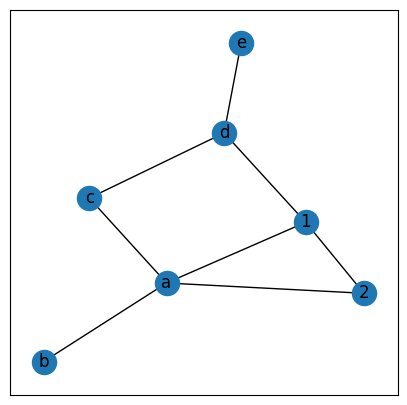

In [8]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G);#randomly depose

Let's try changing the network layout

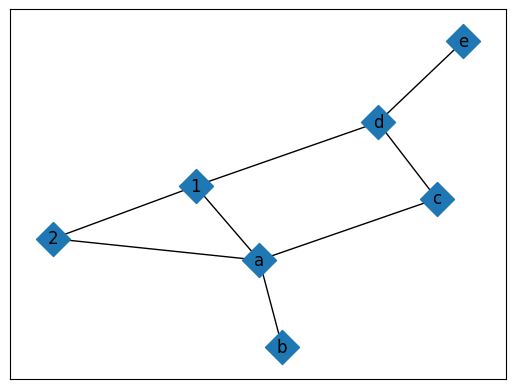

In [9]:
layout=nx.spring_layout(G)#there are many layout you can use
nx.draw_networkx(G, layout, node_shape='D', with_labels=True);#D:diamond,you shold avoid edge that meet交叉

## Generate a path graph

Nodes of graph: 
[0, 1, 2, 3]
Edges of graph: 
[(0, 1), (1, 2), (2, 3)]


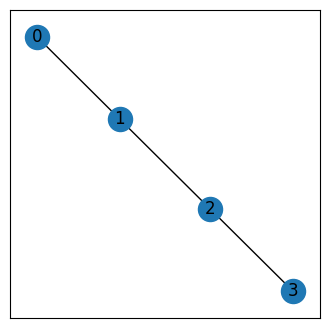

In [11]:
pathG=nx.path_graph(4)#generate standard path graph randomly

print("Nodes of graph: ")
print(pathG.nodes())
print("Edges of graph: ")
print(pathG.edges())

plt.figure(figsize=(4,4))
nx.draw_networkx(pathG);

### Rename nodes

Nodes of graph: 
['Toronto', 'London', 'Berlin', 'New York']
Edges of graph: 
[('Toronto', 'London'), ('London', 'Berlin'), ('Berlin', 'New York')]


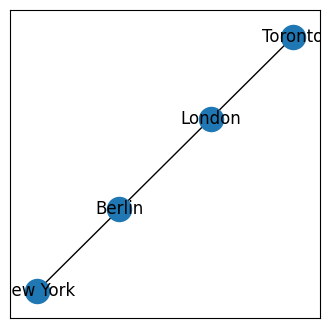

In [12]:
cities = {0:"Toronto",1:"London",2:"Berlin",3:"New York"}

pathG=nx.relabel_nodes(pathG,cities)

print("Nodes of graph: ")
print(pathG.nodes())
print("Edges of graph: ")
print(pathG.edges())

plt.figure(figsize=(4,4))
nx.draw_networkx(pathG);

# Basic analysis

## Load a CSV

Using Pandas you can easily read a CSV file and create a graph in NetworkX.

**Zachary's karate club** is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.

The network became a popular example of community structure in networks. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club.

In [13]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [14]:
# Install the library on your environment
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=2f476b04f0a08ef0cda0b3436b2653f88cb5d5200e425a660b9ebd0557a5a406
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [15]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
doc = 'zacharyKarateClub.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/zacharyKarateClub.csv


In [16]:
import pandas as pd

#Load the CSV into a Pandas dataframe
df = pd.read_csv(fileName)

In [17]:
df#edge_list

,Source,Target
0,1,2
1,1,3
2,2,3
3,1,4
4,2,4
...,...,...
73,29,34
74,30,34
75,31,34
76,32,34


### Create the directed version of the graph

Just for testing, this network is undirected

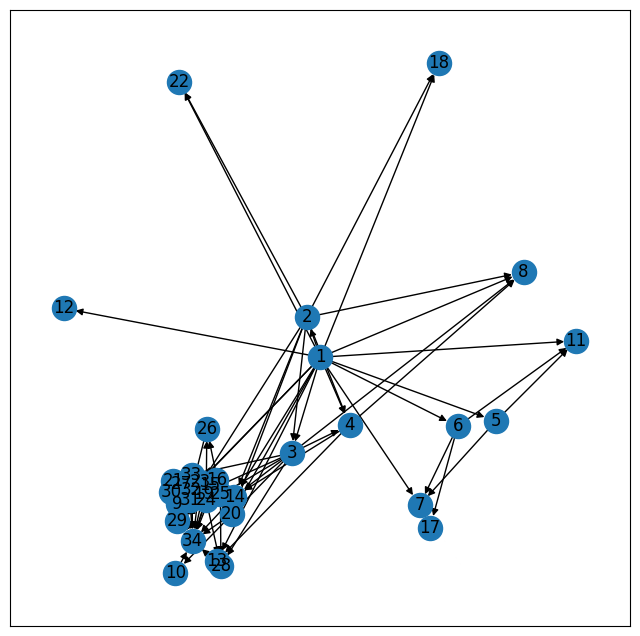

In [18]:
graphType = nx.DiGraph()#generate direct graph
karateClub = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=graphType)#nx.from_pandas_edgelist,a function to import edge list

plt.figure(figsize=(8,8))
nx.draw_networkx(karateClub);

### Create the undirected version of the graph

This graph is **undirected**.

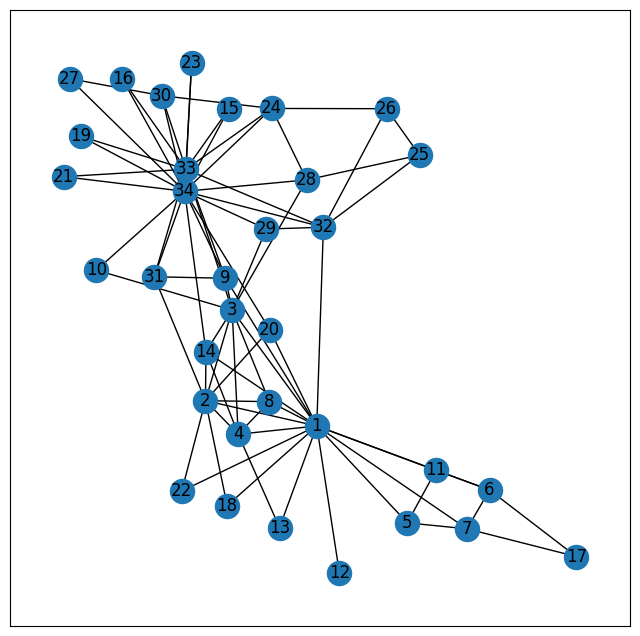

In [19]:
graphType = nx.Graph()#no DiGraph
karateClub = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=graphType)

plt.figure(figsize=(8,8))
nx.draw_networkx(karateClub);

## Graph properties

In [20]:
numNodes = karateClub.order()#the number of nodes
numEdges = karateClub.size()
avgDegree = numEdges/numNodes
print("Nodes: ", numNodes)
print("Edges: ", numEdges)
print("Average degree: ", avgDegree)

Nodes:  34
Edges:  78
Average degree:  2.2941176470588234


## Degree distribution

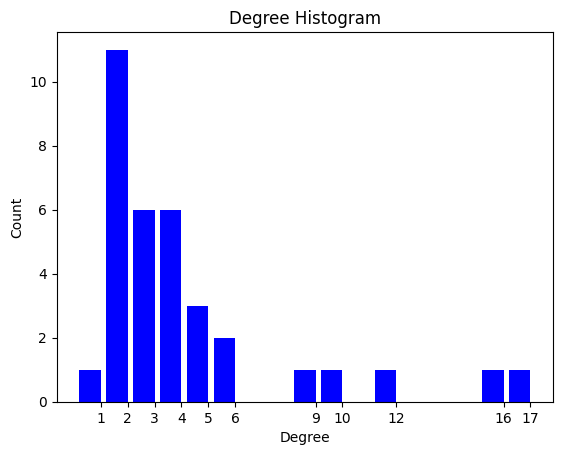

In [21]:
import collections

degree_sequence = sorted([d for n, d in karateClub.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)#compute degree sequence
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show();

### Degree centrality
The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

In [22]:
degree_cent = nx.degree_centrality(karateClub)#degree/number of nodes
degree_cent

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 20: 0.09090909090909091,
 22: 0.06060606060606061,
 24: 0.15151515151515152,
 26: 0.09090909090909091,
 25: 0.09090909090909091,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 27: 0.06060606060606061,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 19: 0.06060606060606061,
 21: 0.06060606060606061,
 23: 0.06060606060606061,
 34: 0.5151515151515151}

### Closeness centrality

In [23]:
close = nx.closeness_centrality(karateClub)#length of shortest path
close

{1: 0.5689655172413793,
 2: 0.4852941176470588,
 3: 0.559322033898305,
 4: 0.4647887323943662,
 5: 0.3793103448275862,
 6: 0.38372093023255816,
 7: 0.38372093023255816,
 8: 0.44,
 9: 0.515625,
 10: 0.4342105263157895,
 11: 0.3793103448275862,
 12: 0.36666666666666664,
 13: 0.3707865168539326,
 14: 0.515625,
 17: 0.28448275862068967,
 18: 0.375,
 20: 0.5,
 22: 0.375,
 24: 0.39285714285714285,
 26: 0.375,
 25: 0.375,
 28: 0.4583333333333333,
 29: 0.4520547945205479,
 30: 0.38372093023255816,
 27: 0.3626373626373626,
 31: 0.4583333333333333,
 32: 0.5409836065573771,
 33: 0.515625,
 15: 0.3707865168539326,
 16: 0.3707865168539326,
 19: 0.3707865168539326,
 21: 0.3707865168539326,
 23: 0.3707865168539326,
 34: 0.55}

### Betweenness centrality

In [24]:
between = nx.betweenness_centrality(karateClub)
between#0:single connection with other node

{1: 0.43763528138528146,
 2: 0.05393668831168831,
 3: 0.14365680615680615,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339585,
 17: 0.0,
 18: 0.0,
 20: 0.032475048100048115,
 22: 0.0,
 24: 0.017613636363636366,
 26: 0.0038404882154882154,
 25: 0.0022095959595959595,
 28: 0.022333453583453577,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 27: 0.0,
 31: 0.014411976911976907,
 32: 0.13827561327561327,
 33: 0.14524711399711404,
 15: 0.0,
 16: 0.0,
 19: 0.0,
 21: 0.0,
 23: 0.0,
 34: 0.30407497594997596}

In [25]:
# Order the nodes in dictionary by using ther centrality value
from operator import itemgetter

print(sorted(between.items(), key=itemgetter(1), reverse = True))

[(1, 0.43763528138528146), (34, 0.30407497594997596), (33, 0.14524711399711404), (3, 0.14365680615680615), (32, 0.13827561327561327), (9, 0.05592682780182781), (2, 0.05393668831168831), (14, 0.04586339586339585), (20, 0.032475048100048115), (6, 0.02998737373737374), (7, 0.029987373737373736), (28, 0.022333453583453577), (24, 0.017613636363636366), (31, 0.014411976911976907), (4, 0.011909271284271283), (26, 0.0038404882154882154), (30, 0.0029220779220779218), (25, 0.0022095959595959595), (29, 0.0017947330447330447), (10, 0.0008477633477633478), (5, 0.0006313131313131313), (11, 0.0006313131313131313), (8, 0.0), (12, 0.0), (13, 0.0), (17, 0.0), (18, 0.0), (22, 0.0), (27, 0.0), (15, 0.0), (16, 0.0), (19, 0.0), (21, 0.0), (23, 0.0)]


### Eigenvector centrality

In [26]:
ev = nx.eigenvector_centrality(karateClub)
ev

{1: 0.35548349418519426,
 2: 0.2659538704545024,
 3: 0.3171893899684447,
 4: 0.21117407832057056,
 5: 0.0759664588165738,
 6: 0.07948057788594245,
 7: 0.07948057788594245,
 8: 0.1709551149803543,
 9: 0.22740509147166046,
 10: 0.10267519030637758,
 11: 0.0759664588165738,
 12: 0.05285416945233646,
 13: 0.08425192086558085,
 14: 0.22646969838808148,
 17: 0.02363479426059687,
 18: 0.0923967566684595,
 20: 0.14791134007618667,
 22: 0.0923967566684595,
 24: 0.1501232869172679,
 26: 0.0592082025027901,
 25: 0.057053735638028055,
 28: 0.13347932684333308,
 29: 0.13107925627221215,
 30: 0.13496528673866567,
 27: 0.07558192219009326,
 31: 0.17476027834493088,
 32: 0.19103626979791702,
 33: 0.30865104773369595,
 15: 0.10140627846270833,
 16: 0.10140627846270833,
 19: 0.10140627846270833,
 21: 0.10140627846270833,
 23: 0.10140627846270833,
 34: 0.373371213013235}

In [27]:
print(sorted(ev.items(), key=itemgetter(1), reverse=True))

[(34, 0.373371213013235), (1, 0.35548349418519426), (3, 0.3171893899684447), (33, 0.30865104773369595), (2, 0.2659538704545024), (9, 0.22740509147166046), (14, 0.22646969838808148), (4, 0.21117407832057056), (32, 0.19103626979791702), (31, 0.17476027834493088), (8, 0.1709551149803543), (24, 0.1501232869172679), (20, 0.14791134007618667), (30, 0.13496528673866567), (28, 0.13347932684333308), (29, 0.13107925627221215), (10, 0.10267519030637758), (15, 0.10140627846270833), (16, 0.10140627846270833), (19, 0.10140627846270833), (21, 0.10140627846270833), (23, 0.10140627846270833), (18, 0.0923967566684595), (22, 0.0923967566684595), (13, 0.08425192086558085), (6, 0.07948057788594245), (7, 0.07948057788594245), (5, 0.0759664588165738), (11, 0.0759664588165738), (27, 0.07558192219009326), (26, 0.0592082025027901), (25, 0.057053735638028055), (12, 0.05285416945233646), (17, 0.02363479426059687)]


### PageRank

In [28]:
pr = nx.pagerank(karateClub)#pagerank
print(sorted(pr.items(), key=itemgetter(1), reverse=True))

[(34, 0.10091791674871214), (1, 0.09700181758983706), (33, 0.07169213006588288), (3, 0.05707842304763673), (2, 0.052878391037427), (32, 0.03715663592267941), (4, 0.035860643223064786), (24, 0.03152091531163228), (9, 0.02976533918616703), (14, 0.02953631497720298), (6, 0.02911334166344221), (7, 0.029113341663442205), (30, 0.02628726283711208), (28, 0.025638803528350497), (31, 0.024589336534292478), (8, 0.02449075803950918), (5, 0.021979406974834498), (11, 0.021979406974834494), (25, 0.021075455001162945), (26, 0.02100562817474579), (20, 0.019604416711937293), (29, 0.019572960509438537), (17, 0.016785378110253487), (27, 0.015043395360629753), (13, 0.014645186487916188), (18, 0.01455885977424349), (22, 0.01455885977424349), (15, 0.014535161524273827), (16, 0.014535161524273827), (19, 0.014535161524273827), (21, 0.014535161524273827), (23, 0.014535161524273827), (10, 0.014308950284462801), (12, 0.009564916863537146)]


## Clustering coefficient (cc)

### Local

Local CC: the degree to which the neighbors of a given node link to each other.

Average CC (averaging the local CC or all the nodes):  the degree of clustering of a whole network!

In [29]:
# Local CC
# Clustering coefficient of node 1
clusteringNode1 = nx.clustering(karateClub, nodes = 1)#the friends of node 1 know each other than node34
print(clusteringNode1)

0.15


In [30]:
# Local CC
# Clustering coefficient of all nodes (in a dictionary)
clustCoefficients = nx.clustering(karateClub)

for node in clustCoefficients:
    value = clustCoefficients[node]
    print('Node: ', node, 'Clustering coefficient: ', value)

Node:  1 Clustering coefficient:  0.15
Node:  2 Clustering coefficient:  0.3333333333333333
Node:  3 Clustering coefficient:  0.24444444444444444
Node:  4 Clustering coefficient:  0.6666666666666666
Node:  5 Clustering coefficient:  0.6666666666666666
Node:  6 Clustering coefficient:  0.5
Node:  7 Clustering coefficient:  0.5
Node:  8 Clustering coefficient:  1.0
Node:  9 Clustering coefficient:  0.5
Node:  10 Clustering coefficient:  0
Node:  11 Clustering coefficient:  0.6666666666666666
Node:  12 Clustering coefficient:  0
Node:  13 Clustering coefficient:  1.0
Node:  14 Clustering coefficient:  0.6
Node:  17 Clustering coefficient:  1.0
Node:  18 Clustering coefficient:  1.0
Node:  20 Clustering coefficient:  0.3333333333333333
Node:  22 Clustering coefficient:  1.0
Node:  24 Clustering coefficient:  0.4
Node:  26 Clustering coefficient:  0.3333333333333333
Node:  25 Clustering coefficient:  0.3333333333333333
Node:  28 Clustering coefficient:  0.16666666666666666
Node:  29 Cluster

In [31]:
# Average CC
avgCC = sum(clustCoefficients.values()) / len(clustCoefficients)
print(avgCC)

0.5706384782076824


# A working example: mentioning network in #ddj
#ddj on Twitter is the hashtag for Data Driven Journalism

In [32]:
import csv
import networkx as nx
from operator import itemgetter

In [33]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
doc = 'ddj_output_mentioning.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/ddj_output_mentioning.csv


In [34]:
with open(fileName, 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [35]:
edges#edge list

[('@GENinnovate', '@darrenlonghk'),
 ('@gijn', '@ICFJ'),
 ('@IJNet', '@ICFJKnight'),
 ('@UjjwalAcharya', '@thetribunechd'),
 ('@emilybell', '@BenedictEvans'),
 ('@emilybell', '@Angrypops2016'),
 ('@gijnAfrica', '@GIJN'),
 ('@RolfeWinkler', '@facebook'),
 ('@BradenGall', '@AvgJ0seph'),
 ('@BradenGall', '@richarddeitsch'),
 ('@ICFJ', '@ICFJKnight'),
 ('@jeffhauser', '@mattyglesias'),
 ('@jeffhauser', '@dylanmatt'),
 ('@IndiaSpend', '@instagram'),
 ('@IJNet', '@arabdjn'),
 ('@small_media', '@nanyjharon'),
 ('@small_media', '@NgeungaM'),
 ('@ICFJ', '@ICFJKnight'),
 ('@Behrang', '@BBCRadio4'),
 ('@NAHJ', '@bdelossantos1'),
 ('@emorwee', '@IRE_NICAR'),
 ('@gijn', '@EvaConstantaras'),
 ('@jburnmurdoch', '@election_data'),
 ('@jburnmurdoch', '@ft'),
 ('@gijn', '@paulbradshaw'),
 ('@pewjournalism', '@googlenewslab'),
 ('@pewjournalism', '@pewjournalism'),
 ('@VoCommunism', '@nfergus'),
 ('@ICFJ', '@ICFJKnight'),
 ('@sandra_barry', '@FiveThirtyEight'),
 ('@IJNet', '@ICFJKnight'),
 ('@jason_kint'

In [36]:
print(len(edges))

3965


In [39]:
G = nx.Graph()
G.add_edges_from(edges)
print(G)
#print(nx.info(G)),info doesn't work
#there are missing edge 2781<3965,undirected graph doesn't make double mention again,if you have been@ in a twitter, it count only once

Graph with 2677 nodes and 2781 edges


In [40]:
density = nx.density(G)
print("Network density:", density)#this graph is very sparse,maximum density is 1

Network density: 0.0007764196250739148


In [43]:
path1 = nx.shortest_path(G, source="@gijn", target="@GoldsmithsUoL")

print("Shortest path", path1)
print("Length of that path:", len(path1)-1)#number of nodes minors one

Shortest path ['@gijn', '@guardian', '@cijournalism', '@GoldsmithsUoL']
Length of that path: 3


In [44]:
nx.diameter(G) #we can not compute diameter of graph because it is disconnect,we can only compute diameter of simple component

NetworkXError: ignored

In [45]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 19


In [ ]:
## Centrality measures

In [46]:
degree_dict = dict(G.degree(G.nodes()))

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('@gijn', 314)
('@albertocairo', 68)
('@GENinnovate', 52)
('@palewire', 41)
('@mediatwit', 40)
('@Bahareh360', 39)
('@smfrogers', 34)
('@dancow', 32)
('@IJNet', 31)
('@chrismoranuk', 30)
('@Megan_Lucero', 30)
('@googlenewslab', 29)
('@IndiaSpend', 28)
('@gijnAfrica', 25)
('@neo4j', 24)
('@nikkiusher', 20)
('@mattwaite', 20)
('@IRE_NICAR', 19)
('@ProPublica', 19)
('@derekwillis', 19)


In [47]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('@gijn', 0.19211899661148446)
('@GENinnovate', 0.05915542537923154)
('@albertocairo', 0.05851055313363719)
('@palewire', 0.031066865041195116)
('@smfrogers', 0.029077982158289762)
('@mediatwit', 0.028267474360917585)
('@IRE_NICAR', 0.025766765841260877)
('@googlenewslab', 0.023501402505080118)
('@LNdata', 0.020445692671534167)
('@dancow', 0.017511841239806227)
('@Bahareh360', 0.01692343086693021)
('@GoogleTrends', 0.01671832257839628)
('@ProPublica', 0.016483653464207628)
('@chrismoranuk', 0.016122800718854215)
('@Agenzia_Italia', 0.01597586019026864)
('@mberzosa', 0.014115171472164416)
('@IJNet', 0.013597458528141015)
('@Megan_Lucero', 0.012727850130818707)
('@dataeditor', 0.012593886034428474)
('@IndiaSpend', 0.012375965003196163)


# Additional Resources
https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python